<a href="https://colab.research.google.com/github/WaadAlharthi/ML_Portfolio/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [ ]:
# Create dataframes
df_bank = pd.read_csv("1-Churn_Modelling.csv")
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df_bank.describe(include="O").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
u_geo = df_bank['Geography'].unique().tolist()
u_geo

['France', 'Spain', 'Germany']

*   We decided to remove surnames to avoid causing a racial bias

In [ ]:
df_bank.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


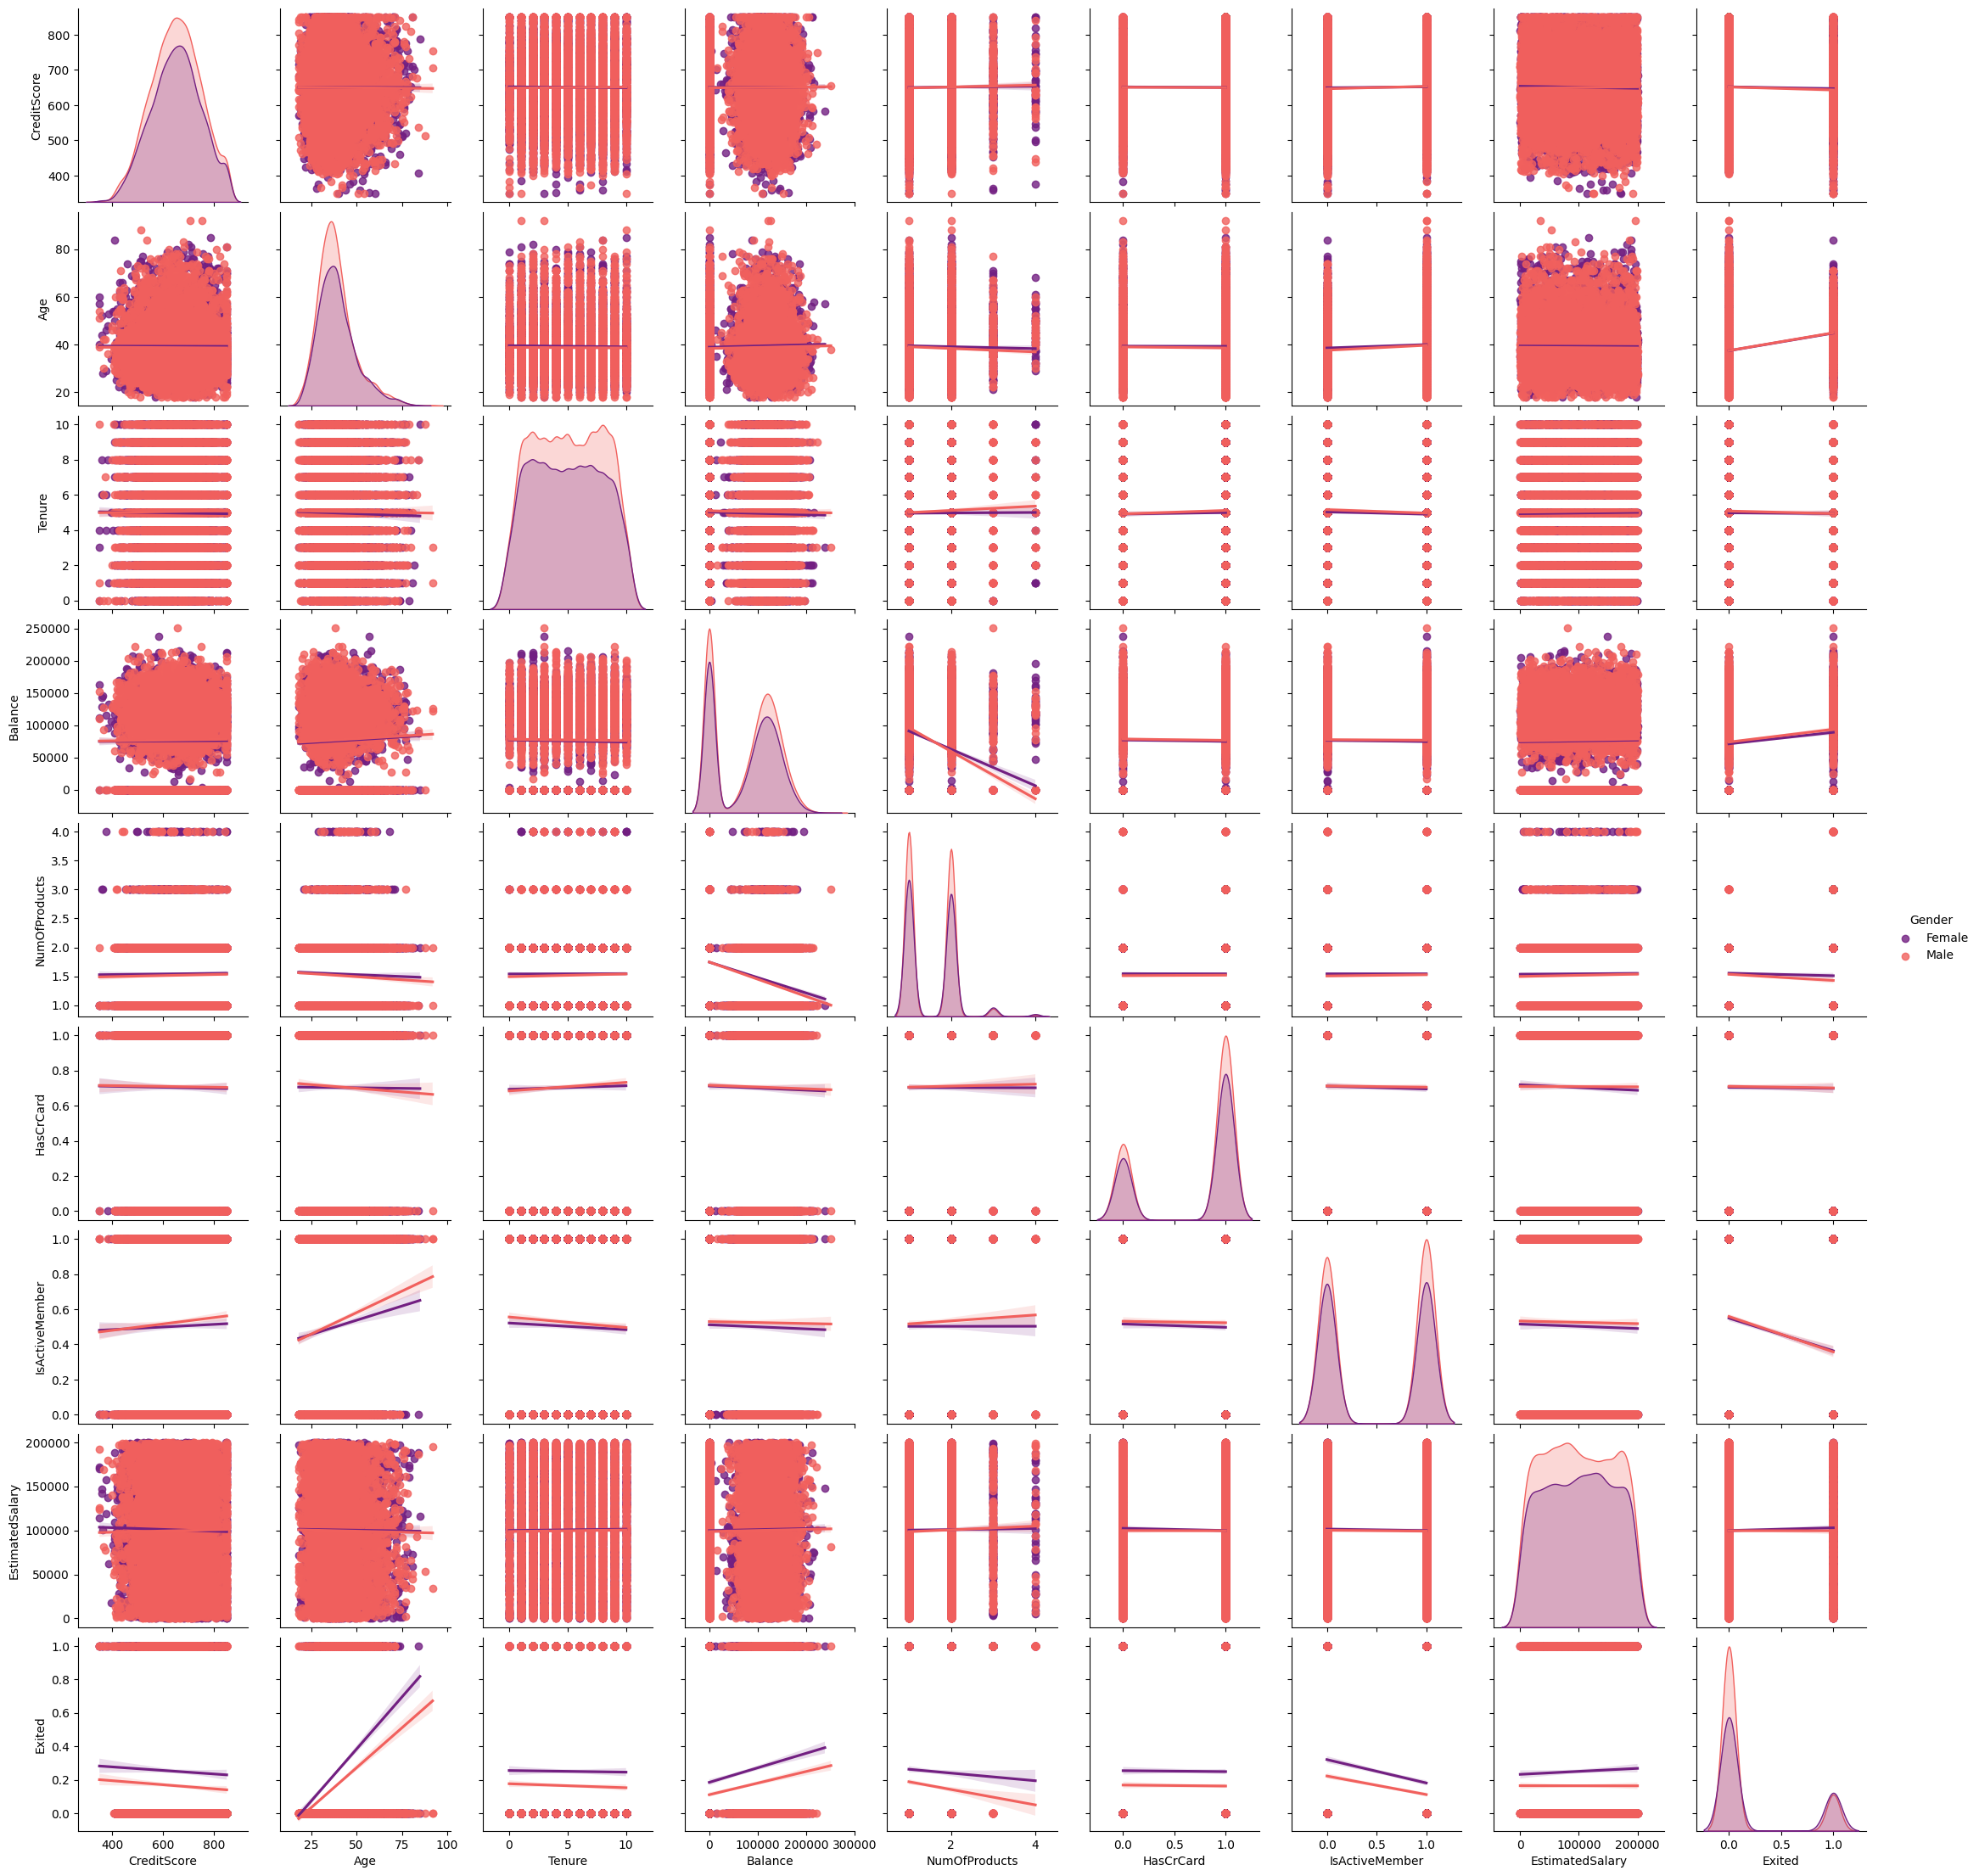

In [ ]:
sns.pairplot(df_bank, kind="reg", hue='Gender', palette="magma")

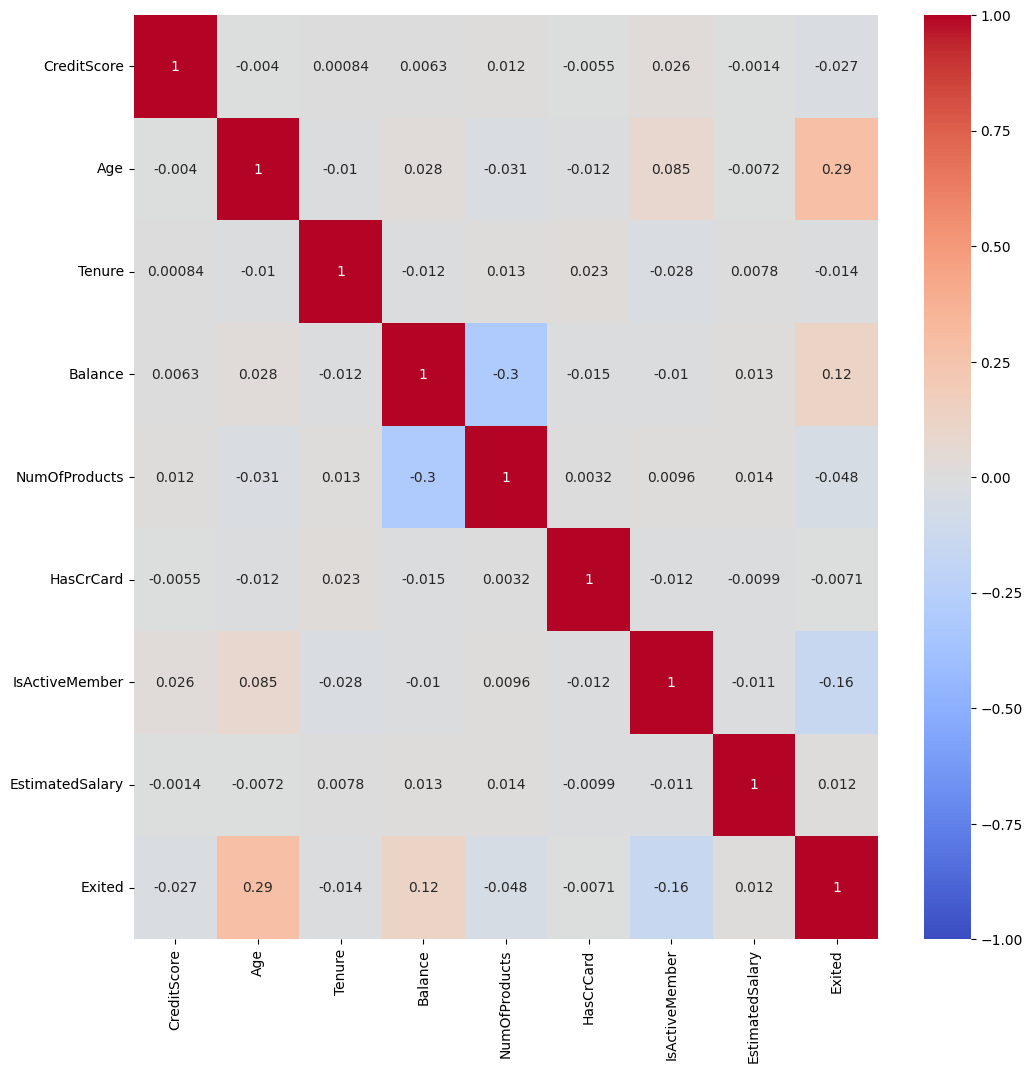

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_bank.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

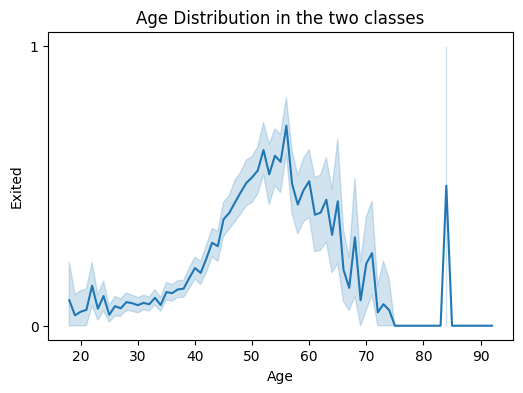

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(x="Age", y="Exited", data=df_bank)
plt.yticks([0,1])
plt.xlabel("Age")
plt.ylabel("Exited")
plt.title("Age Distribution in the two classes")
plt.show()

In [ ]:
df1, df2 = [x for _, x in df_bank.groupby(df_bank['Exited'] == 1)]
# df2 contains customers who closed their accounts

In [ ]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [ ]:
df1.describe(include="O").T

,count,unique,top,freq
Geography,7963,3,France,4204
Gender,7963,2,Male,4559


In [ ]:
df2.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [ ]:
df2.describe(include="O").T

,count,unique,top,freq
Geography,2037,3,Germany,814
Gender,2037,2,Female,1139


*   By seperating the dataset by the target labels we can see that the data is
unbalanced. The number of observations of customers who are still with the bank is 3 times the number of those who left.
*   The average age of customers who left is 44, while of the customers who stayed is 37.
*   The average of credit score and tenure is aboyt the same.





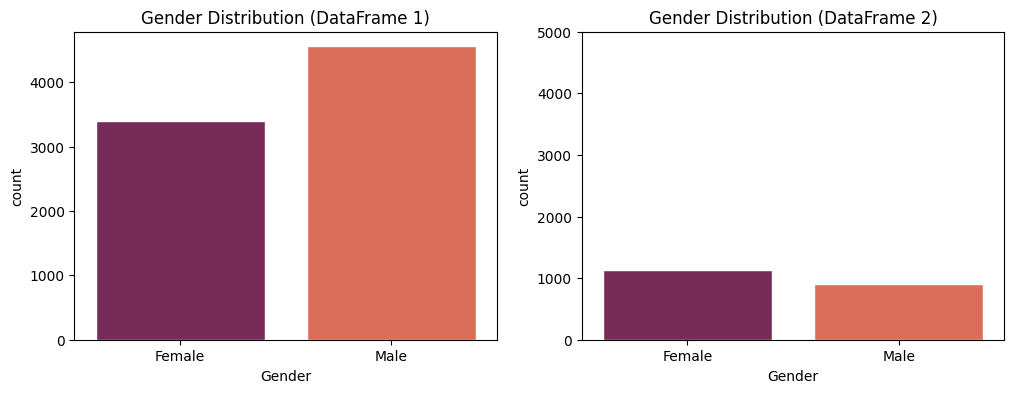

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set(style="whitegrid")
sns.countplot(x="Gender", data=df1, palette="rocket", ax=axes[0])
plt.ylim(0, 5000)
axes[0].set_title("Gender Distribution (DataFrame 1)")

# Plot the second count plot
sns.set(style="whitegrid")
sns.countplot(x="Gender", data=df2, palette="rocket", ax=axes[1])
plt.ylim(0, 5000)
axes[1].set_title("Gender Distribution (DataFrame 2)")

plt.show()

*   The female to male ratio in each class is slightly unbalanced. More female cutomers left the bank.

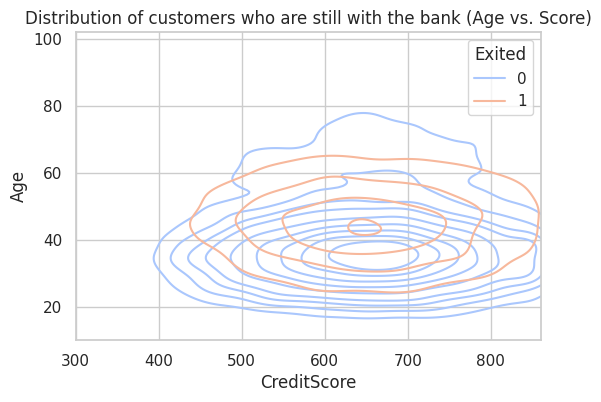

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_bank, x="CreditScore", y="Age", hue="Exited", fill=False, palette ="coolwarm")
plt.title('Distribution of customers who are still with the bank (Age vs. Score)')
plt.xlim(300, df1['CreditScore'].max() + 10)
plt.ylim(10, df1['Age'].max() + 10)
plt.show()

*   This density plot shows that customers who left the bank are slightly older.

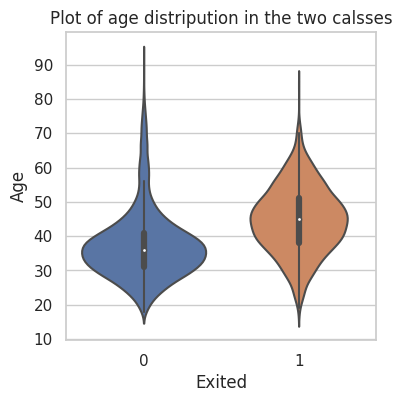

In [ ]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='Exited', y='Age', data=df_bank)
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Plot of age distripution in the two calsses')
plt.show()

*   The distripution shows that customers who left the bank are slightly older. Most data of customers who stayed are in their 30s while customers who left are around 50.

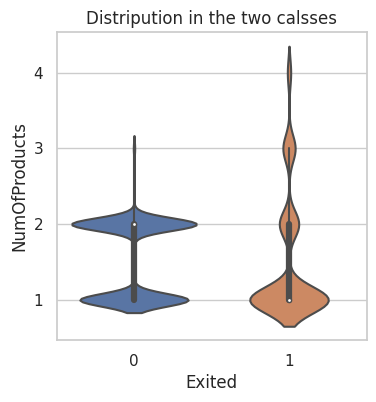

In [ ]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='Exited', y='NumOfProducts', data=df_bank)
plt.yticks([1, 2, 3, 4])
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.title('Distripution in the two calsses')
plt.show()

*   Interstingly, customers who left the bank were utilising more products than those who are still with the bank.

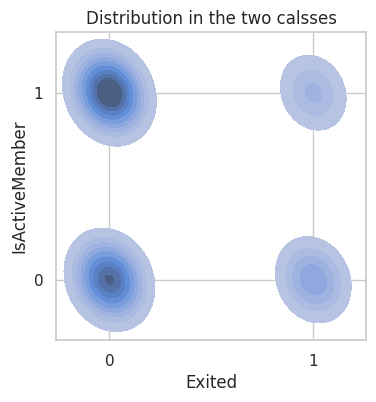

In [ ]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=df_bank, x='Exited', y='IsActiveMember', fill=True)

plt.yticks([0, 1])
plt.xticks([0, 1])

plt.xlabel('Exited')
plt.ylabel('IsActiveMember')
plt.title('Distribution in the two calsses')
plt.show()

*   This density plot shows that most active customers are still with the bank.

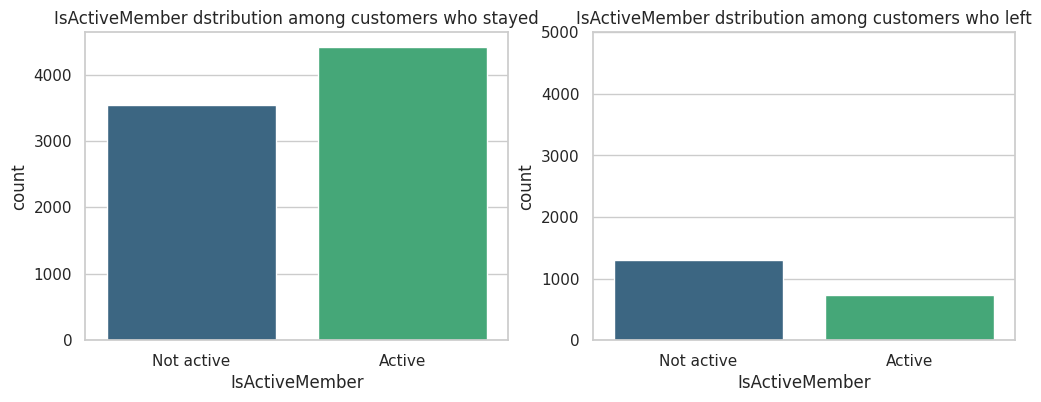

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set(style="whitegrid")
plot1= sns.countplot(x="IsActiveMember", data=df1, palette="viridis", ax=axes[0])
plot1.set_xticklabels(["Not active","Active"])
plt.ylim(0, 5000)
axes[0].set_title("IsActiveMember dstribution among customers who stayed")

# Plot the second count plot
sns.set(style="whitegrid")
plot2= sns.countplot(x="IsActiveMember", data=df2, palette="viridis", ax=axes[1])
plot2.set_xticklabels(["Not active","Active"])
plt.ylim(0, 5000)
axes[1].set_title("IsActiveMember dstribution among customers who left")

plt.show()

*   This plot shows the distribution more clearly. Most customers who left the bank were not active and most customers who are still with the bank are active.

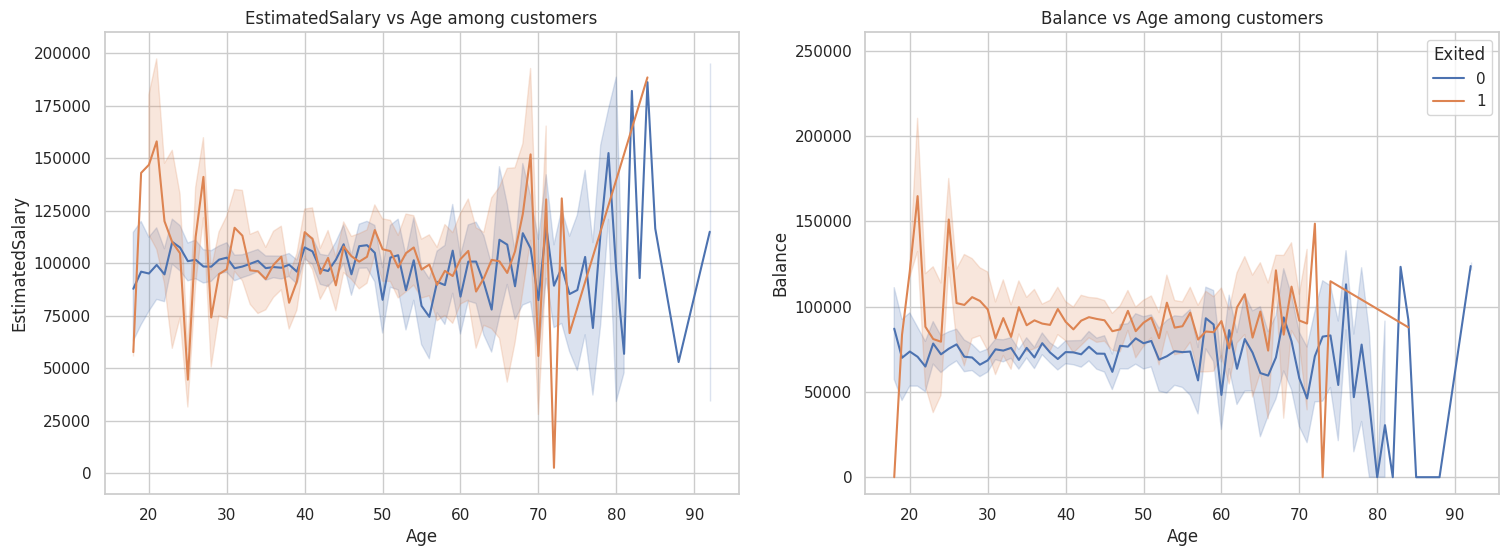

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.set(style="whitegrid")
sns.lineplot(x="Age", y="EstimatedSalary", hue="Exited",data=df_bank, ax=axes[0])
axes[0].get_legend().set_visible(False)
axes[0].set_ylim(df_bank['EstimatedSalary'].min()-10000,  df_bank['EstimatedSalary'].max() + 10000)
axes[0].set_title("EstimatedSalary vs Age among customers")

sns.set(style="whitegrid")
sns.lineplot(x="Age", y="Balance", hue="Exited",data=df_bank, ax=axes[1])
axes[1].set_ylim(df_bank['Balance'].min()-10000, df_bank['Balance'].max() + 10000)
axes[1].set_title("Balance vs Age among customers")

plt.show()



*   The second line plot shows that, on average, customers who left the bank have had higher balance in their account than those those who stayed.
*   Almost no young customers had a zero balance and no salary.



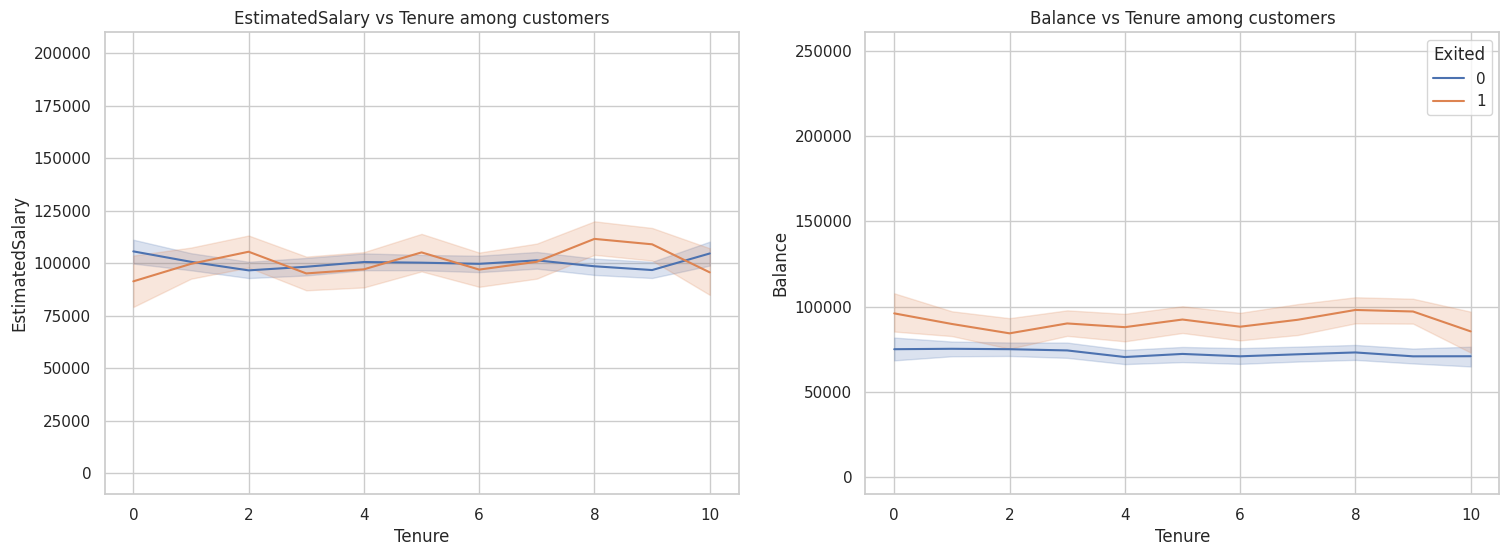

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.set(style="whitegrid")
sns.lineplot(x="Tenure", y="EstimatedSalary", hue="Exited",data=df_bank, ax=axes[0])
axes[0].get_legend().set_visible(False)
axes[0].set_ylim(df_bank['EstimatedSalary'].min()-10000,  df_bank['EstimatedSalary'].max() + 10000)
axes[0].set_title("EstimatedSalary vs Tenure among customers")

sns.set(style="whitegrid")
sns.lineplot(x="Tenure", y="Balance", hue="Exited",data=df_bank, ax=axes[1])
axes[1].set_ylim(df_bank['Balance'].min()-10000, df_bank['Balance'].max() + 10000)
axes[1].set_title("Balance vs Tenure among customers")

plt.show()

These plots show the Estimated Salary and  Balance relationship with the Tenure of customers instead of age, here we notice that the customers who had a higher balance had always had a higher balance **not only prior to leaving the account**.

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
df_bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df_bank['Gender'] = df_bank['Gender'].map({'Male': 0, 'Female': 1})
df_bank['Geography'] = df_bank['Geography'].map({'Spain': 0, 'France': 1, 'Germany':2})

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_bank.drop(columns=['Exited'])
y = df_bank['Exited']

In [ ]:
# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the data to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 7963, 1: 7963}


In [ ]:
# Step 1: Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the scaled feature data, and y_train and y_test contain the target variable data.


#Another split for the validation data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.15, random_state=42)


In [ ]:
print("Training data shape: ", X_train_split.shape, " , Labels : ", y_train_split.shape)
print("Validation data shape: ", X_val_split.shape, " , Labels : ", y_val_split.shape)
print("Test data shape: ", X_test_scaled.shape, " , Labels : ", y_test.shape)

Training data shape:  (11506, 10)  , Labels :  (11506,)
Validation data shape:  (2031, 10)  , Labels :  (2031,)
Test data shape:  (2389, 10)  , Labels :  (2389,)


# Modelling & Model Performance

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, Callback


from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc , roc_curve
from sklearn.metrics import recall_score, f1_score

epochs=500

2.14.0


In [ ]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [ ]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Tue Oct 31 17:15:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## without class_weight

### Create The Model

*   Starting with small model on unbalanced data

In [ ]:
tf.compat.v1.reset_default_graph

model1 = Sequential()

model1.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model1.add(Dense(6, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

print(model1.summary())
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history1= model1.fit(X_train_split,y_train_split, epochs=epochs, validation_data= (X_val_split,y_val_split), verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
def plot_training_validation_accuracy(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['accuracy'], label='Training', color="green")
    plt.plot(history.history['val_accuracy'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    #plt.tight_layout()
    plt.show()

def plot_training_validation_loss(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['loss'], label='Training', color="green")
    plt.plot(history.history['val_loss'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    #plt.tight_layout()
    plt.show()

def plot_training_validation_recall(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['recall'], label='Training', color="green")
    plt.plot(history.history['val_recall'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    #plt.tight_layout()
    plt.show()

def plot_training_validation_AUC(history):
    training_auc = history.history['auc']
    validation_auc = history.history['val_auc']

    plt.figure(figsize=(6, 4))

    # Plot training AUC
    plt.plot(range(1, len(training_auc) + 1), training_auc, label='Training AUC', color='blue')

    # Plot validation AUC
    plt.plot(range(1, len(validation_auc) + 1), validation_auc, label='Validation AUC', color='red')

    plt.title('AUC Curve')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_AUC(y_test, y_pred):
    # Compute ROC curve and ROC AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Calculate ROC AUC score
    roc_auc_score_value = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Display ROC AUC score
    print(f'ROC AUC Score: {roc_auc_score_value:.2f}')

def plot_heatmap(mat):
    plt.figure(figsize=(4, 4))
    sns.heatmap(mat.T, square=True, annot= True, fmt='d')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

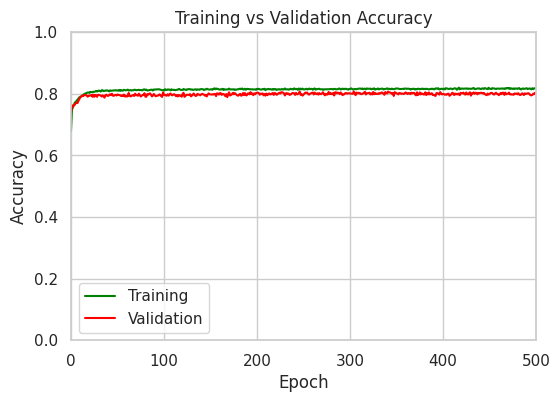

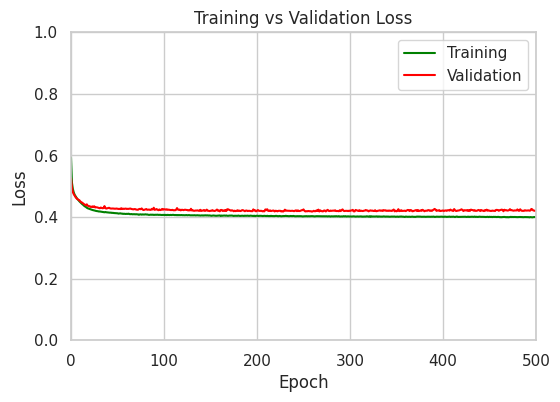

64/64 [==============================] - 0s 2ms/step


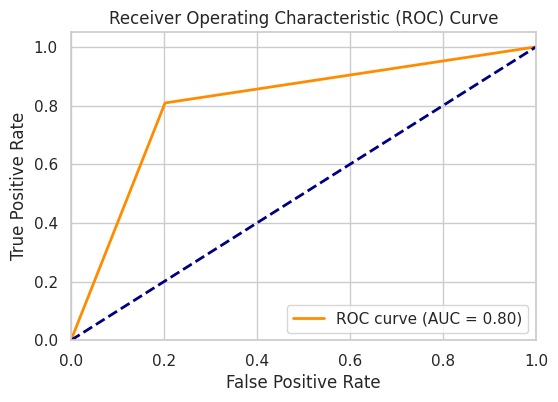

ROC AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       984
           1       0.81      0.81      0.81      1047

    accuracy                           0.80      2031
   macro avg       0.80      0.80      0.80      2031
weighted avg       0.80      0.80      0.80      2031



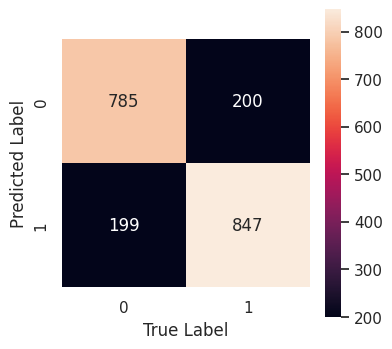

In [ ]:
plot_training_validation_accuracy(history1)
plot_training_validation_loss(history1)

y_pred = model1.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

*   This model cannot exceed 80% accuracy

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 36)                396       
                                                                 
 dense_4 (Dense)             (None, 18)                666       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1278 (4.99 KB)
Trainable params: 1278 (4.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


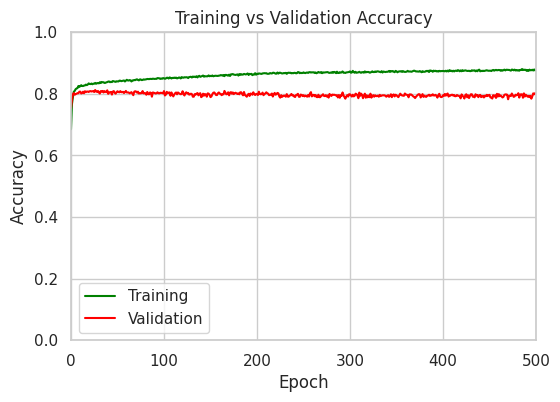

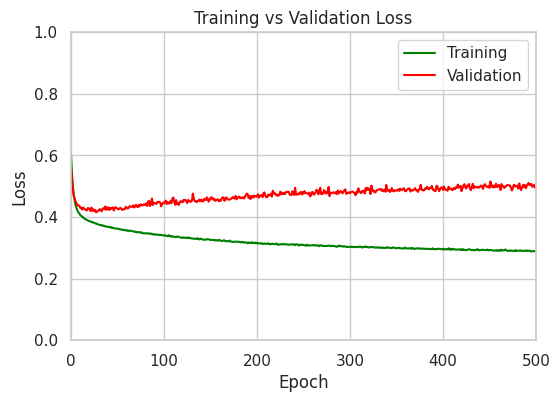

64/64 [==============================] - 0s 2ms/step


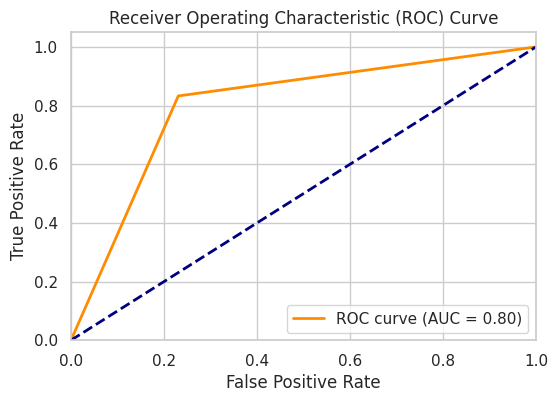

ROC AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       984
           1       0.79      0.83      0.81      1047

    accuracy                           0.80      2031
   macro avg       0.80      0.80      0.80      2031
weighted avg       0.80      0.80      0.80      2031



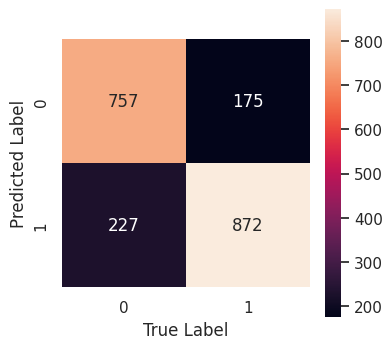

In [ ]:
tf.compat.v1.reset_default_graph

model2 = Sequential()

model2.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dense(18, activation="relu"))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(4, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

print(model2.summary())
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history2= model2.fit(X_train_split,y_train_split, epochs=epochs, validation_data= (X_val_split,y_val_split), verbose=0)


plot_training_validation_accuracy(history2)
plot_training_validation_loss(history2)

y_pred = model2.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

## with class_weight

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
tf.compat.v1.reset_default_graph

model3 = Sequential()

model3.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model3.add(Dense(18, activation="relu"))
model3.add(Dense(9, activation="relu"))
model3.add(Dense(4, activation="sigmoid"))
model3.add(Dense(1, activation="sigmoid"))

print(model3.summary())
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history3= model3.fit(X_train_split,y_train_split, epochs=epochs, validation_data= (X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2}) ## Giving more importance for class 1 by assigning a higher weight

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                396       
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 4)                 40        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1278 (4.99 KB)
Trainable params: 1278 (4.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

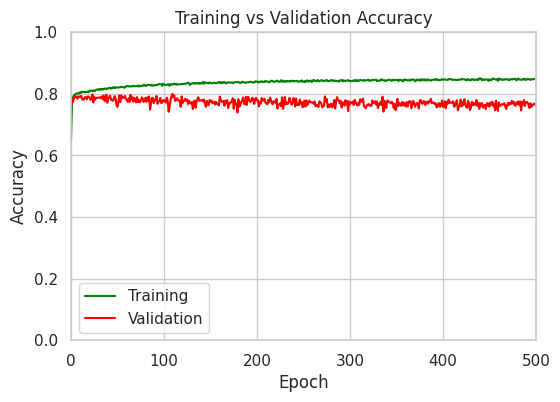

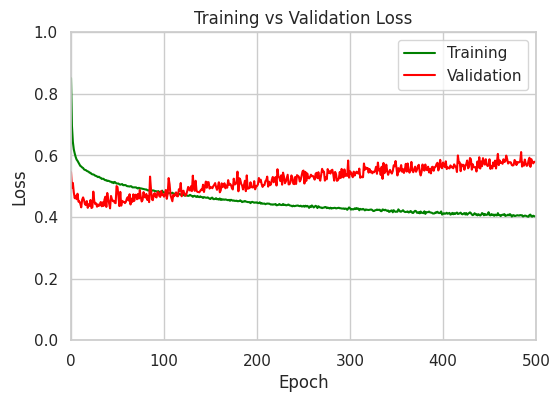

64/64 [==============================] - 0s 2ms/step


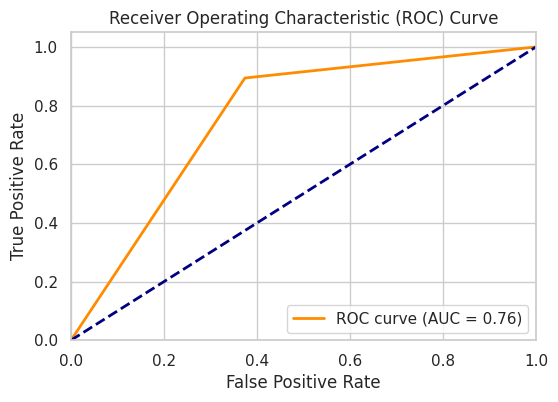

ROC AUC Score: 0.76
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       984
           1       0.72      0.89      0.80      1047

    accuracy                           0.76      2031
   macro avg       0.78      0.76      0.76      2031
weighted avg       0.78      0.76      0.76      2031



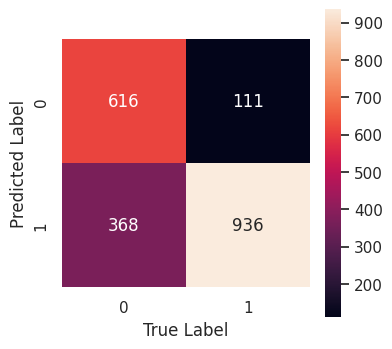

In [ ]:
plot_training_validation_accuracy(history3)
plot_training_validation_loss(history3)

y_pred = model3.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

## Implementation Different Methods to Develop The Model

- Implement the following methods on model created with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [ ]:
default_optimizer = Adam()
default_learning_rate = default_optimizer.learning_rate
print("Default learning rate:", default_learning_rate)

Default learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 36)                396       
                                                                 
 dense_14 (Dense)            (None, 18)                666       
                                                                 
 dense_15 (Dense)            (None, 9)                 171       
                                                                 
 dense_16 (Dense)            (None, 4)                 40        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1278 (4.99 KB)
Trainable params: 1278 (4.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


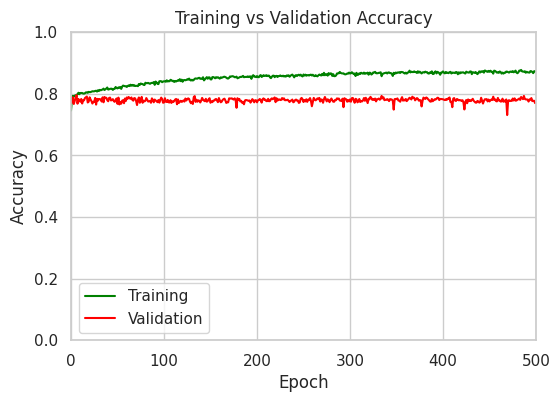

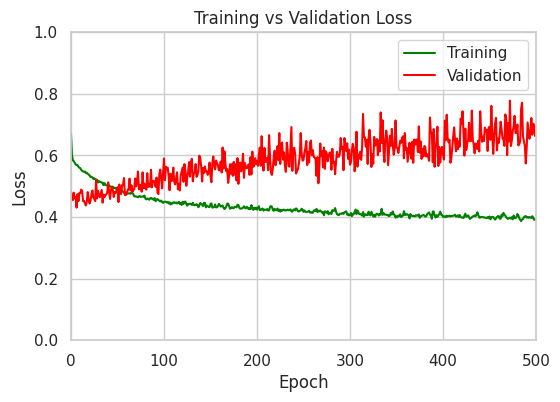

64/64 [==============================] - 0s 2ms/step


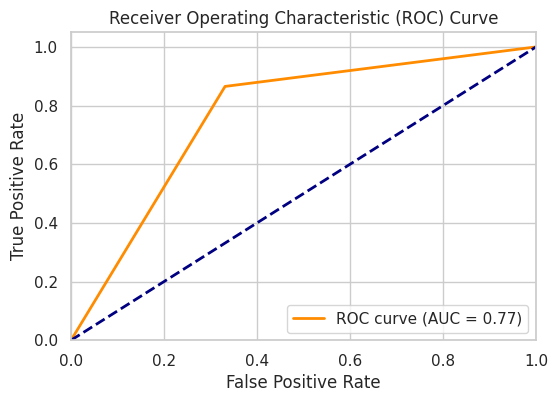

ROC AUC Score: 0.77
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       984
           1       0.74      0.87      0.80      1047

    accuracy                           0.77      2031
   macro avg       0.78      0.77      0.77      2031
weighted avg       0.78      0.77      0.77      2031



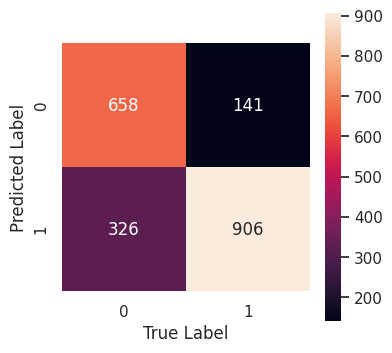

In [ ]:
tf.compat.v1.reset_default_graph

model4 = Sequential()

model4.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dense(18, activation="relu"))
model4.add(Dense(9, activation="relu"))
model4.add(Dense(4, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

print(model4.summary())
model4.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
history4= model4.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2})


### Evaluate
plot_training_validation_accuracy(history4)
plot_training_validation_loss(history4)

y_pred = model4.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 36)                396       
                                                                 
 dense_19 (Dense)            (None, 18)                666       
                                                                 
 dense_20 (Dense)            (None, 9)                 171       
                                                                 
 dense_21 (Dense)            (None, 4)                 40        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1278 (4.99 KB)
Trainable params: 1278 (4.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


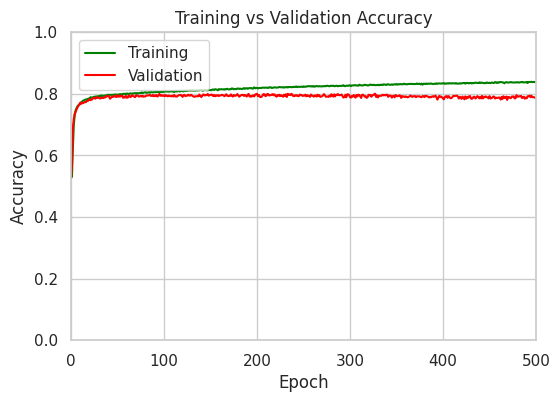

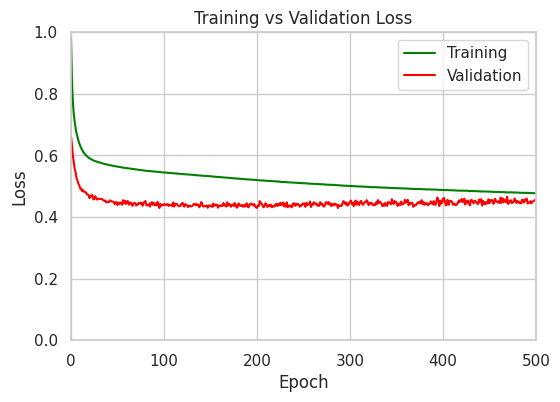

64/64 [==============================] - 0s 2ms/step


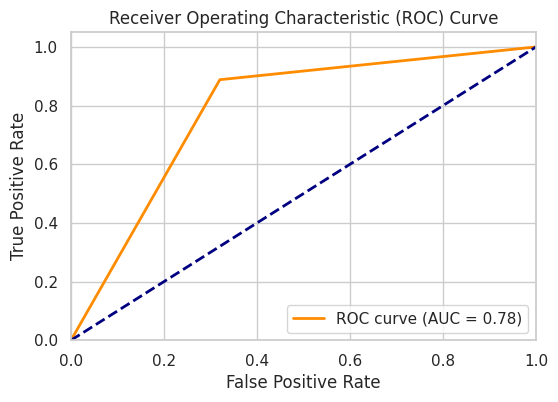

ROC AUC Score: 0.78
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       984
           1       0.75      0.89      0.81      1047

    accuracy                           0.79      2031
   macro avg       0.80      0.78      0.78      2031
weighted avg       0.80      0.79      0.78      2031



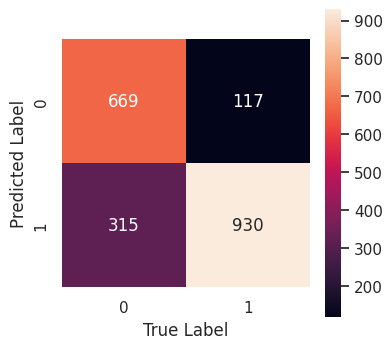

In [ ]:
tf.compat.v1.reset_default_graph

model5 = Sequential()

model5.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(18, activation="relu"))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(4, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

print(model5.summary())
model5.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history5= model5.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2})


### Evaluate
plot_training_validation_accuracy(history5)
plot_training_validation_loss(history5)

y_pred = model5.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 36)                396       
                                                                 
 dense_24 (Dense)            (None, 18)                666       
                                                                 
 dense_25 (Dense)            (None, 9)                 171       
                                                                 
 dense_26 (Dense)            (None, 4)                 40        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1278 (4.99 KB)
Trainable params: 1278 (4.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


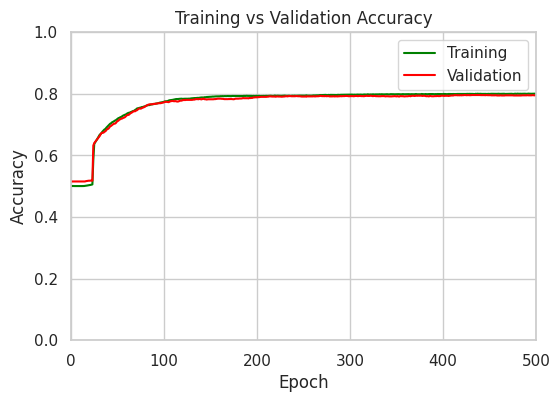

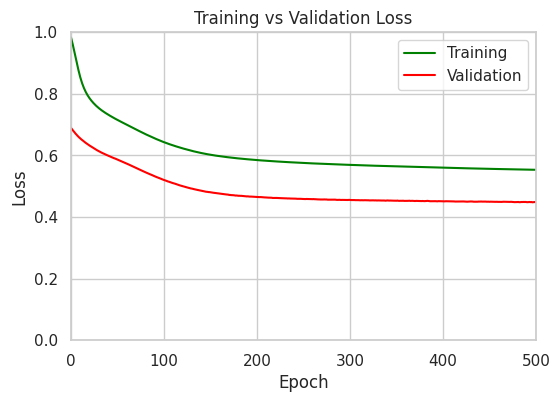

64/64 [==============================] - 0s 2ms/step


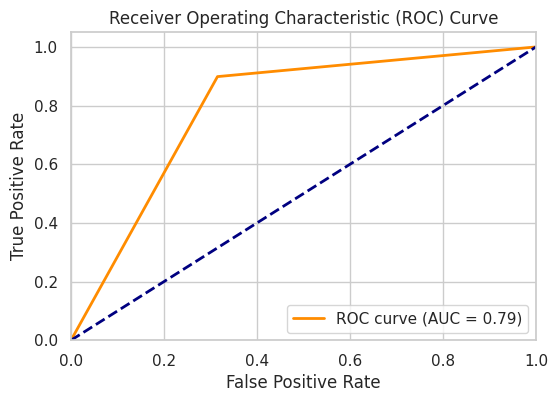

ROC AUC Score: 0.79
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       984
           1       0.75      0.90      0.82      1047

    accuracy                           0.80      2031
   macro avg       0.81      0.79      0.79      2031
weighted avg       0.81      0.80      0.79      2031



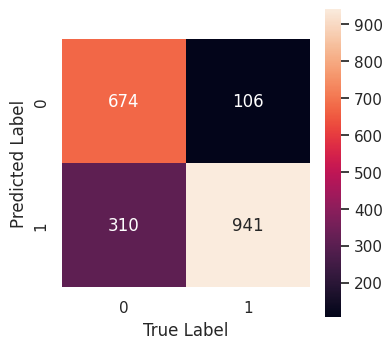

In [ ]:
tf.compat.v1.reset_default_graph

model5 = Sequential()

model5.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(18, activation="relu"))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(4, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

print(model5.summary())
model5.compile(optimizer=Adam(learning_rate=0.00001), loss="binary_crossentropy", metrics=["accuracy"])
history5= model5.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2})


### Evaluate
plot_training_validation_accuracy(history5)
plot_training_validation_loss(history5)

y_pred = model5.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

Using a smaller learning rate (0.00001) performed slightly better than (0.0001), while the default (0.001) and (0.01) maybe too large for this training data.


### Add Dropout Layer

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 36)                396       
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_29 (Dense)            (None, 18)                666       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_30 (Dense)            (None, 9)                 171       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_31 (Dense)            (None, 4)                

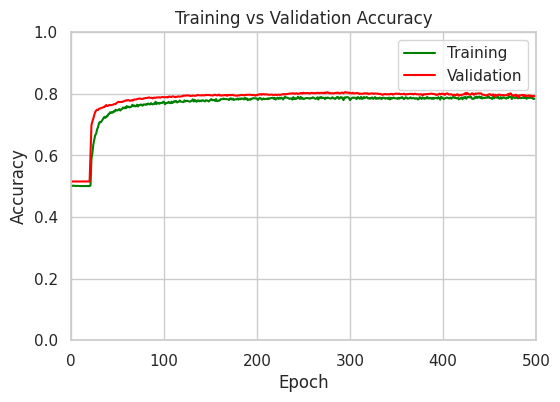

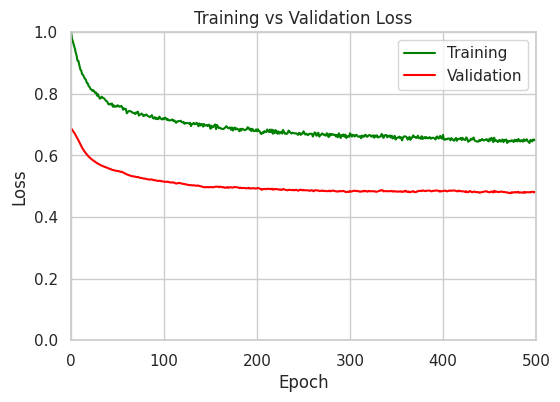

64/64 [==============================] - 0s 2ms/step


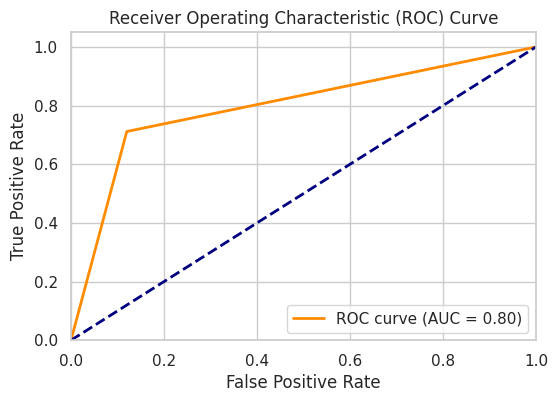

ROC AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       984
           1       0.86      0.71      0.78      1047

    accuracy                           0.79      2031
   macro avg       0.80      0.80      0.79      2031
weighted avg       0.80      0.79      0.79      2031



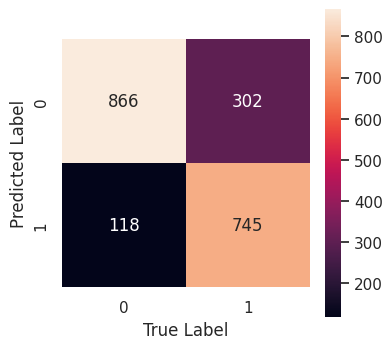

In [ ]:
tf.compat.v1.reset_default_graph

model6 = Sequential()

model6.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dropout(0.5))
model6.add(Dense(18, activation="relu"))
model6.add(Dropout(0.5))
model6.add(Dense(9, activation="relu"))
model6.add(Dropout(0.5))
model6.add(Dense(4, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

print(model6.summary())
model6.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history6= model6.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2})


### Evaluate
plot_training_validation_accuracy(history6)
plot_training_validation_loss(history6)

y_pred = model6.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 36)                396       
                                                                 
 dropout_3 (Dropout)         (None, 36)                0         
                                                                 
 dense_34 (Dense)            (None, 18)                666       
                                                                 
 dropout_4 (Dropout)         (None, 18)                0         
                                                                 
 dense_35 (Dense)            (None, 9)                 171       
                                                                 
 dense_36 (Dense)            (None, 4)                 40        
                                                                 
 dense_37 (Dense)            (None, 1)                

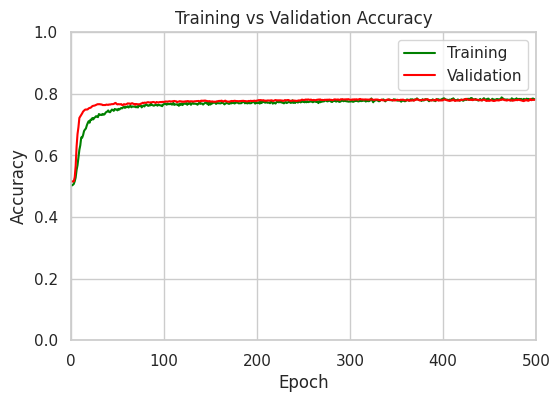

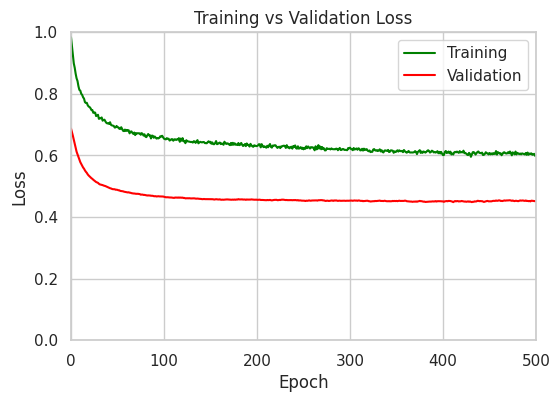

64/64 [==============================] - 0s 2ms/step


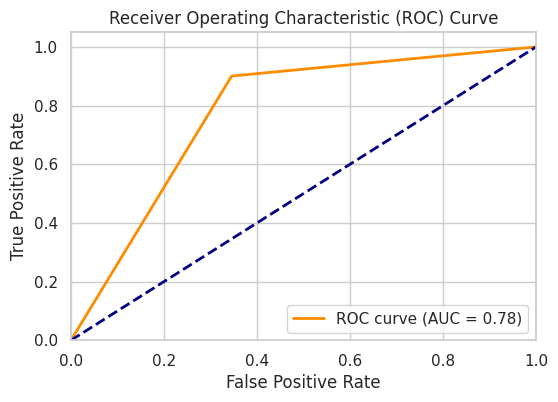

ROC AUC Score: 0.78
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       984
           1       0.73      0.90      0.81      1047

    accuracy                           0.78      2031
   macro avg       0.80      0.78      0.78      2031
weighted avg       0.80      0.78      0.78      2031



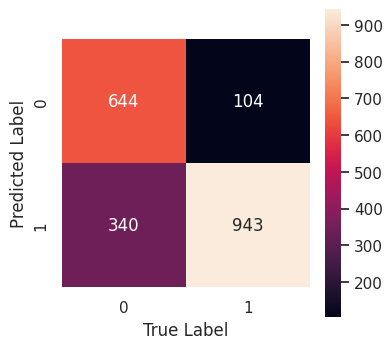

In [ ]:
tf.compat.v1.reset_default_graph

model6 = Sequential()

model6.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dropout(0.5))
model6.add(Dense(18, activation="relu"))
model6.add(Dropout(0.5))
model6.add(Dense(9, activation="relu"))
model6.add(Dense(4, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

print(model6.summary())
model6.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history6= model6.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2})


### Evaluate
plot_training_validation_accuracy(history6)
plot_training_validation_loss(history6)

y_pred = model6.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

*   Dropout layers didn't improve the model much

### Add Early Stop

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 36)                396       
                                                                 
 dropout_5 (Dropout)         (None, 36)                0         
                                                                 
 dense_39 (Dense)            (None, 18)                666       
                                                                 
 dropout_6 (Dropout)         (None, 18)                0         
                                                                 
 dense_40 (Dense)            (None, 9)                 171       
                                                                 
 dense_41 (Dense)            (None, 4)                 40        
                                                                 
 dense_42 (Dense)            (None, 1)                

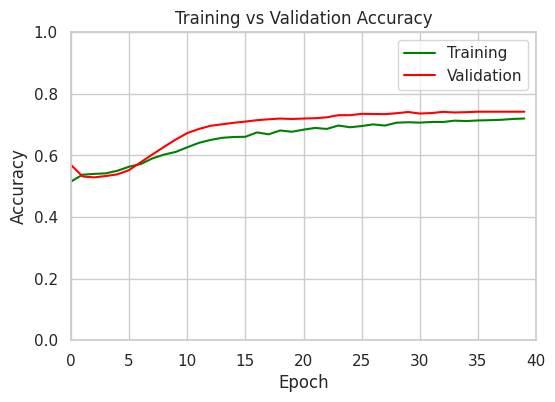

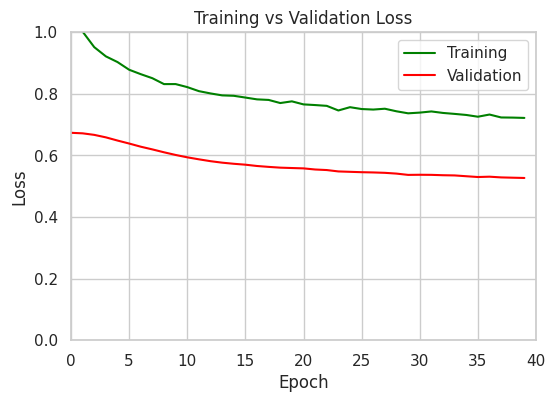

64/64 [==============================] - 0s 2ms/step


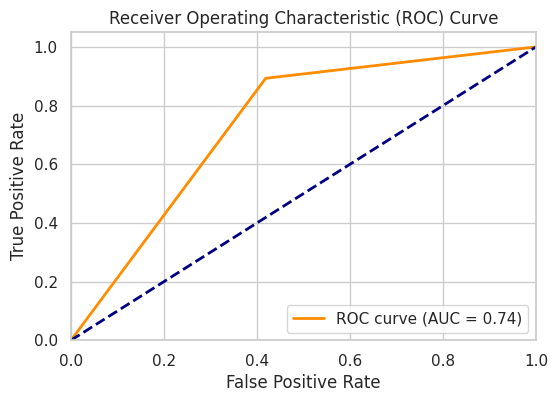

ROC AUC Score: 0.74
              precision    recall  f1-score   support

           0       0.84      0.58      0.69       984
           1       0.69      0.89      0.78      1047

    accuracy                           0.74      2031
   macro avg       0.77      0.74      0.73      2031
weighted avg       0.76      0.74      0.73      2031



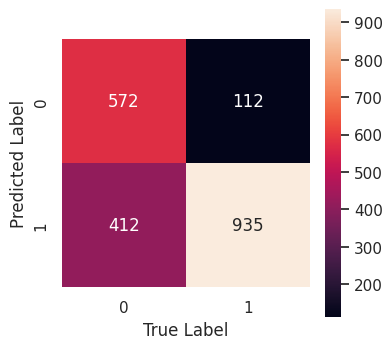

In [ ]:
tf.compat.v1.reset_default_graph

model7 = Sequential()

model7.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model7.add(Dropout(0.5))
model7.add(Dense(18, activation="relu"))
model7.add(Dropout(0.5))
model7.add(Dense(9, activation="relu"))
model7.add(Dense(4, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

print(model7.summary())
model7.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)


history7= model7.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2}, callbacks=[early_stopping])


### Evaluate
plot_training_validation_accuracy(history7)
plot_training_validation_loss(history7)

y_pred = model7.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

#### Monitor the "val_loss" as metric

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 36)                396       
                                                                 
 dropout_7 (Dropout)         (None, 36)                0         
                                                                 
 dense_44 (Dense)            (None, 18)                666       
                                                                 
 dropout_8 (Dropout)         (None, 18)                0         
                                                                 
 dense_45 (Dense)            (None, 9)                 171       
                                                                 
 dense_46 (Dense)            (None, 4)                 40        
                                                                 
 dense_47 (Dense)            (None, 1)                

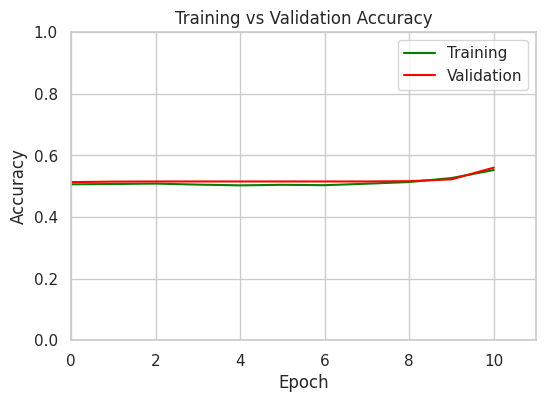

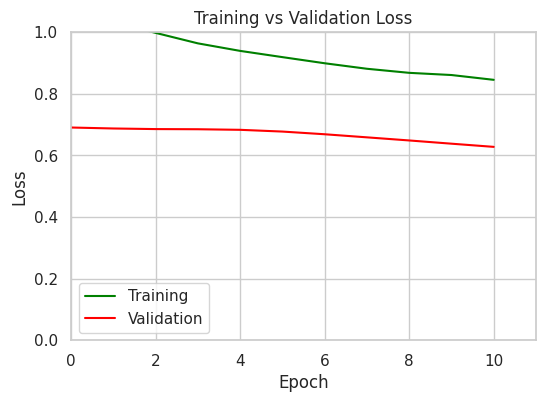

64/64 [==============================] - 0s 2ms/step


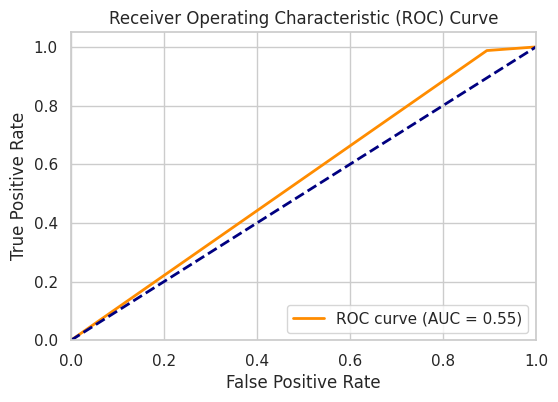

ROC AUC Score: 0.55
              precision    recall  f1-score   support

           0       0.89      0.11      0.19       984
           1       0.54      0.99      0.70      1047

    accuracy                           0.56      2031
   macro avg       0.71      0.55      0.44      2031
weighted avg       0.71      0.56      0.45      2031



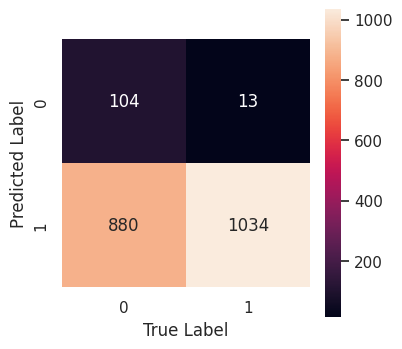

In [ ]:
tf.compat.v1.reset_default_graph

model8 = Sequential()

model8.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model8.add(Dropout(0.5))
model8.add(Dense(18, activation="relu"))
model8.add(Dropout(0.5))
model8.add(Dense(9, activation="relu"))
model8.add(Dense(4, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

print(model8.summary())
model8.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)


history8= model8.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2}, callbacks=[early_stopping])


### Evaluate
plot_training_validation_accuracy(history8)
plot_training_validation_loss(history8)

y_pred = model8.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

#### Monitor the "val_recall" as metric

In [ ]:
## I'm crating  a custom recall callback due to early stopping error :
## WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,recall_1,val_loss,val_recall_1

# Create a custom callback to calculate recall on the validation data
class RecallCallback(Callback):
    def __init__(self, validation_data):
        super(RecallCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_pred = np.round(self.model.predict(x_val))
        val_recall = recall_score(y_val, y_pred)
        logs["val_recall"] = val_recall
        print(f"val_recall: {val_recall:.4f}")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 36)                396       
                                                                 
 dropout_9 (Dropout)         (None, 36)                0         
                                                                 
 dense_49 (Dense)            (None, 18)                666       
                                                                 
 dropout_10 (Dropout)        (None, 18)                0         
                                                                 
 dense_50 (Dense)            (None, 9)                 171       
                                                                 
 dense_51 (Dense)            (None, 4)                 40        
                                                                 
 dense_52 (Dense)            (None, 1)               

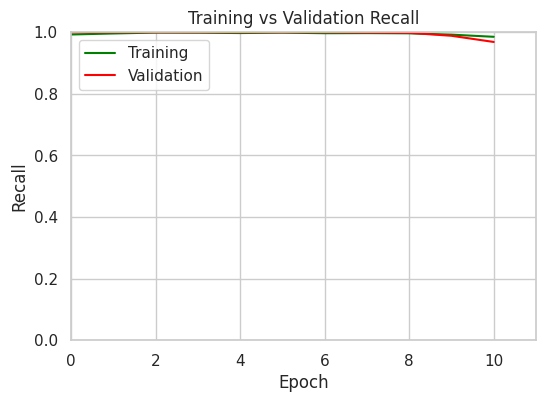

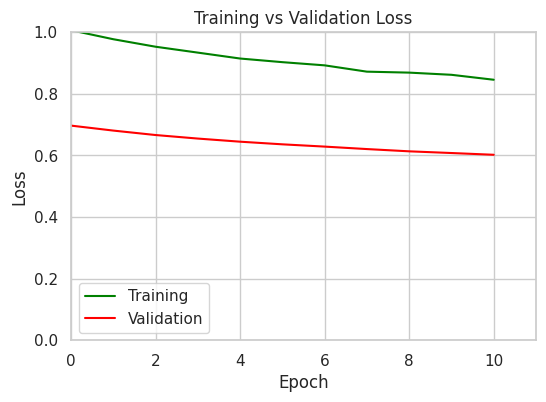

64/64 [==============================] - 0s 2ms/step


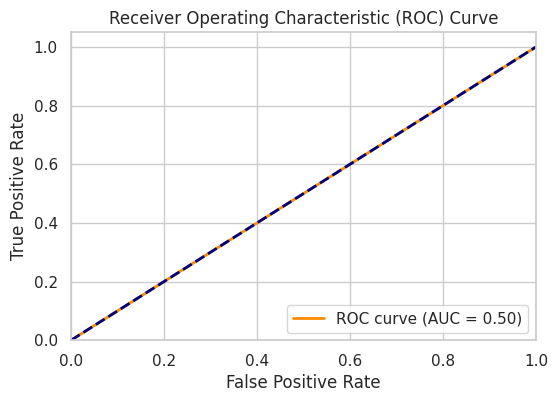

ROC AUC Score: 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       984
           1       0.52      1.00      0.68      1047

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.35      2031



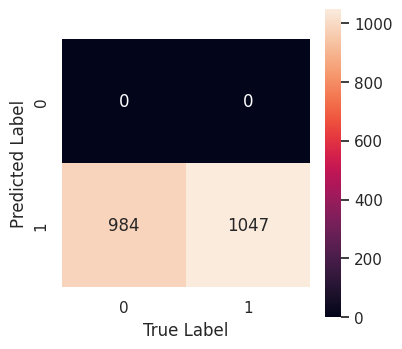

In [ ]:
tf.compat.v1.reset_default_graph

model9 = Sequential()

model9.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model9.add(Dropout(0.5))
model9.add(Dense(18, activation="relu"))
model9.add(Dropout(0.5))
model9.add(Dense(9, activation="relu"))
model9.add(Dense(4, activation="relu"))
model9.add(Dense(1, activation="sigmoid"))

print(model9.summary())
model9.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])


# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor="val_recall",  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1,                # Print messages when early stopping occurs
    restore_best_weights=True
)
# Define and use the custom RecallCallback
recall_callback = RecallCallback(validation_data=(X_val_split, y_val_split))


history9= model9.fit(X_train_split,y_train_split, epochs=epochs, validation_data=(X_val_split,y_val_split), verbose=0, class_weight={0:1, 1:2}, callbacks=[recall_callback, early_stopping])


### Evaluate
plot_training_validation_recall(history9)
plot_training_validation_loss(history9)

y_pred = model9.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

## Optuna

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
from keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [ ]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [ ]:
trial_metric = tf.keras.metrics.Recall()
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train_split,
        y_train_split,
         validation_data=(X_val_split,y_val_split),
        batch_size=batch_size,
        epochs=500,
        callbacks=[recall_callback,early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val_split, y_val_split, verbose=0)[1]
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-31 18:50:05,906] A new study created in memory with name: no-name-a09c3e40-87fa-4df3-b99c-22c3470892d8


64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 1ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 3ms/step
val_recall: 1.0000
64/64 [==============================] - 1s 6ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 4ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 3ms/step
val_recall: 1.0000
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-10-31 18:50:27,915] Trial 0 finished with value: 1.0 and parameters: {'n_units1': 119, 'n_units2': 64, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00021018713828379622, 'w0': 0.03663364587592928, 'w1': 3.576208803800427}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 4ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 3ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 3ms/step
val_recall: 0.9990
64/64 [==============================] - 0s 3ms/step
val_recall: 0.9990
64/64 [==============================] - 0s 3ms/step
val_recall: 0.9990
64/64 [==============================] - 0s 4ms/step
val_recall: 0.9990
64/64 [==============================] - 0s 3ms/step
val_recall: 0.9981
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9990
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9971
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9971
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9981
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9981
64/64 [==============================] - 0s 2ms/step
val_recall:

[I 2023-10-31 18:51:12,198] Trial 1 finished with value: 0.9914039969444275 and parameters: {'n_units1': 21, 'n_units2': 98, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0034619732554818975, 'w0': 0.045565700996962326, 'w1': 4.175544696983648}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.0248
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0172
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0544
64/64 [==============================] - 0s 2ms/step
val_recall: 0.1748
64/64 [==============================] - 0s 2ms/step
val_recall: 0.2827
64/64 [==============================] - 0s 2ms/step
val_recall: 0.3830
64/64 [==============================] - 0s 2ms/step
val_recall: 0.4327
64/64 [==============================] - 0s 2ms/step
val_recall: 0.4795
64/64 [==============================] - 0s 3ms/step
val_recall: 0.5072
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5205
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5310
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5415
Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


[I 2023-10-31 18:51:33,745] Trial 2 finished with value: 0.017191976308822632 and parameters: {'n_units1': 121, 'n_units2': 58, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 2.8352179662575987e-05, 'w0': 0.048773231406065064, 'w1': 0.01899254551531724}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.7221
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7230
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7230
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7230
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7240
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7249
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7278
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7278
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7287
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7307
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7307
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-10-31 18:51:45,149] Trial 3 finished with value: 0.7220630645751953 and parameters: {'n_units1': 68, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 4.683811878204738e-05, 'w0': 0.10495662040633397, 'w1': 4.042772591881427}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.9580
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9704
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9847
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9952
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9962
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9971
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9981
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 1.0000
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-10-31 18:52:06,697] Trial 4 finished with value: 0.9579751491546631 and parameters: {'n_units1': 70, 'n_units2': 51, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0016368731058878279, 'w0': 0.010156517396650357, 'w1': 2.573051051739497}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.8223
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8138
64/64 [==============================] - 0s 3ms/step
val_recall: 0.8042
64/64 [==============================] - 0s 3ms/step
val_recall: 0.7880
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7765
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7574
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7373
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7163
64/64 [==============================] - 0s 2ms/step
val_recall: 0.6877
64/64 [==============================] - 0s 2ms/step
val_recall: 0.6619
64/64 [==============================] - 0s 2ms/step
val_recall: 0.6294
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5998
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5664
64/64 [==============================] - 0s 2ms/step
val_recall:

[I 2023-10-31 18:53:29,499] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 28, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008051877683293891, 'w0': 1.5337396970557027, 'w1': 0.061306746864397015}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 3ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 3ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-10-31 18:53:41,168] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 47, 'n_units2': 44, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0003025632543216689, 'w0': 4.5356336397786245, 'w1': 0.01769891750629017}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.1767
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0411
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0029
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall: 0.0000
64/64 [==============================] - 0s 2ms/step
val_recall:

[I 2023-10-31 18:53:56,077] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 10, 'n_units2': 72, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.02500737279154068, 'w0': 3.1178139141759837, 'w1': 0.2930198458496539}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.8921
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8787
64/64 [==============================] - 0s 3ms/step
val_recall: 0.8949
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8949
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8663
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9351
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9236
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8548
64/64 [==============================] - 0s 2ms/step
val_recall: 0.9112
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8892
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8825
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8844
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8777
64/64 [==============================] - 0s 2ms/step
val_recall:

[I 2023-10-31 18:54:17,380] Trial 8 finished with value: 0.8548232913017273 and parameters: {'n_units1': 67, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.004129955254057206, 'w0': 0.01061730940295444, 'w1': 0.01930352100827069}. Best is trial 0 with value: 1.0.


64/64 [==============================] - 0s 2ms/step
val_recall: 0.2875
64/64 [==============================] - 0s 2ms/step
val_recall: 0.4699
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5358
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5358
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5540
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5444
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5463
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5578
64/64 [==============================] - 0s 3ms/step
val_recall: 0.5444
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5807
64/64 [==============================] - 0s 2ms/step
val_recall: 0.5587
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-10-31 18:54:29,081] Trial 9 finished with value: 0.28748807311058044 and parameters: {'n_units1': 48, 'n_units2': 39, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0003973560732638087, 'w0': 3.19614593326691, 'w1': 0.9105370194345082}. Best is trial 0 with value: 1.0.


{'n_units1': 119,
 'n_units2': 64,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.00021018713828379622,
 'w0': 0.03663364587592928,
 'w1': 3.576208803800427}

In [ ]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.compat.v1.reset_default_graph

model_optuna = Sequential()
model_optuna.add(Dense(unit1, activation="relu"))
model_optuna.add(Dense(unit2, activation="relu"))
model_optuna.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)


model_optuna.compile(optimizer=opt, loss="binary_crossentropy", metrics=tf.keras.metrics.Recall())

history_optuna = model_optuna.fit(
    X_train_split,
    y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=epochs,
    callbacks=[recall_callback,early_stop],
    verbose=0,
)

print(model_optuna.summary())

64/64 [==============================] - 0s 2ms/step
val_recall: 0.7708
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7899
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8042
64/64 [==============================] - 0s 2ms/step
val_recall: 0.8271
64/64 [==============================] - 0s 5ms/step
val_recall: 0.8080
64/64 [==============================] - 0s 2ms/step
val_recall: 0.7889
64/64 [==============================] - 0s 5ms/step
val_recall: 0.7889
64/64 [==============================] - 0s 3ms/step
val_recall: 0.8032
64/64 [==============================] - 0s 3ms/step
val_recall: 0.8013
64/64 [==============================] - 1s 8ms/step
val_recall: 0.8376
64/64 [==============================] - 0s 3ms/step
val_recall: 0.8147
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
history_optuna.history.keys()

dict_keys(['loss', 'recall_2', 'val_loss', 'val_recall_2', 'val_recall'])

In [ ]:

def plot_training_validation_recall(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['recall_2'], label='Training', color="green")
    plt.plot(history.history['val_recall_2'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    #plt.tight_layout()
    plt.show()

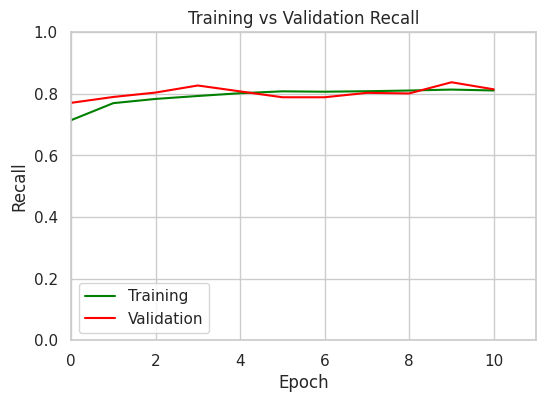

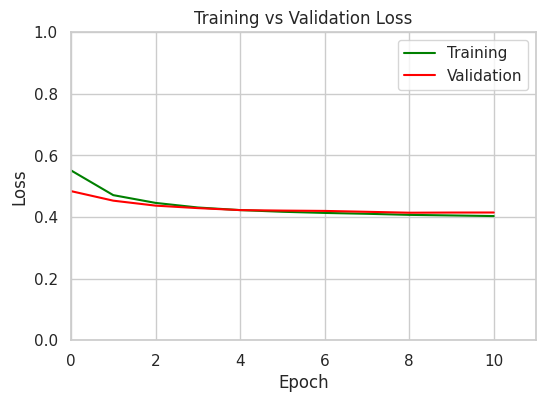

64/64 [==============================] - 0s 2ms/step


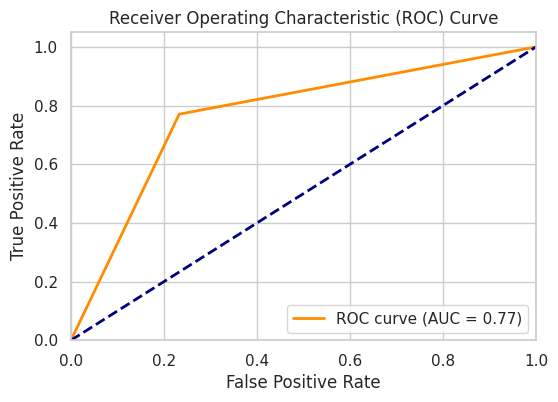

ROC AUC Score: 0.77
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       984
           1       0.78      0.77      0.77      1047

    accuracy                           0.77      2031
   macro avg       0.77      0.77      0.77      2031
weighted avg       0.77      0.77      0.77      2031



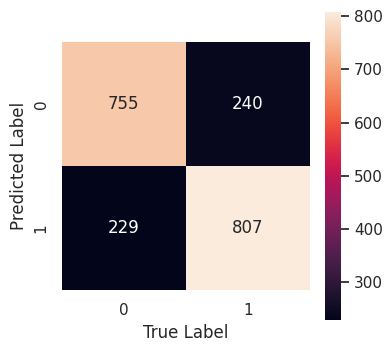

In [ ]:
### Evaluate
#plot_training_validation_accuracy(history_optuna)
plot_training_validation_recall(history_optuna)
plot_training_validation_loss(history_optuna)

y_pred = model_optuna.predict(X_val_split) > 0.5
mat= metrics.confusion_matrix(y_val_split, y_pred)
plot_AUC(y_val_split, y_pred)
plot_heatmap(mat)

print(classification_report(y_val_split, y_pred))

# Final Model and Model Deployment

The best performing model on the training data was model 6#


I will retrain this model on the entire training and validation data.

In [ ]:
print(model6.summary())
history6= model6.fit(X_train_scaled,y_train, epochs=epochs, verbose=0, class_weight={0:1, 1:2})

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 36)                396       
                                                                 
 dropout_3 (Dropout)         (None, 36)                0         
                                                                 
 dense_34 (Dense)            (None, 18)                666       
                                                                 
 dropout_4 (Dropout)         (None, 18)                0         
                                                                 
 dense_35 (Dense)            (None, 9)                 171       
                                                                 
 dense_36 (Dense)            (None, 4)                 40        
                                                                 
 dense_37 (Dense)            (None, 1)                

## Prediction

75/75 [==============================] - 0s 2ms/step


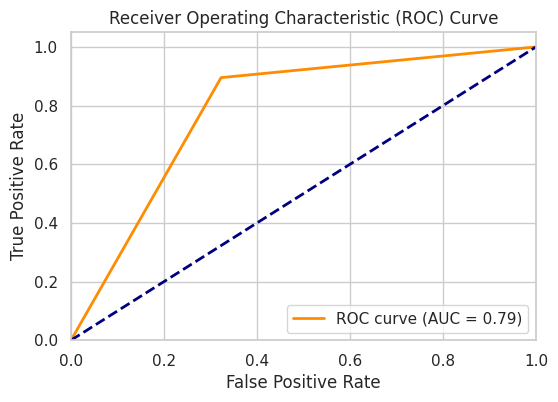

ROC AUC Score: 0.79
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1233
           1       0.72      0.90      0.80      1156

    accuracy                           0.78      2389
   macro avg       0.80      0.79      0.78      2389
weighted avg       0.80      0.78      0.78      2389



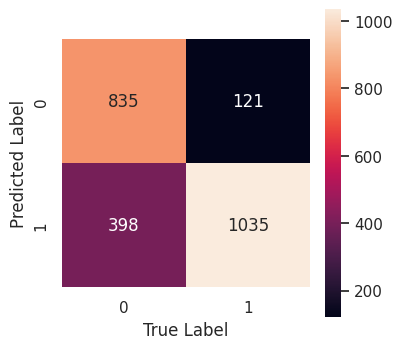

In [ ]:
y_pred = model6.predict(X_test_scaled) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_AUC(y_test, y_pred)
plot_heatmap(mat)

print(classification_report(y_test, y_pred))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___